In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch import optim
import Data
from Data import CSVData
from train_model import train_model
from DNN import DNN

In [2]:
features = ['pz_in1', 
'pid_in1', 
'pid_in2', 
'px_out1',
'py_out1',
'pz_out1',
'e_out1',
'pid_out1',
'px_out2',
'py_out2',
'pz_out2',
'e_out2',
'pid_out2',
'px_out3',
'py_out3',
'pz_out3',
'e_out3',
'pid_out3',
'px_out4',
'py_out4',
'pz_out4',
'e_out4',
'pid_out4',
'Mtarget',
'Gtarget',]
label = 'f_rwt'
VLQData = CSVData(batch_size=1024, features_name=features, labels_name=label, file_names=['./train_'+str(i)+'.csv' for i in range(0,10)])
test_data = CSVData(batch_size=1024, features_name=features, labels_name=label, file_names=['./test_0.csv'])

In [3]:
net = DNN(Layers=[25,16,8,4]).build_model()
optimizer = optim.Adam(net.parameters(), lr=0.001)
epochs=300

In [4]:
losses, test_losses = train_model.train(train_data=VLQData, test_data = test_data, net = net, optimizer=optimizer, epochs=epochs)

Epoch 1: 1.0


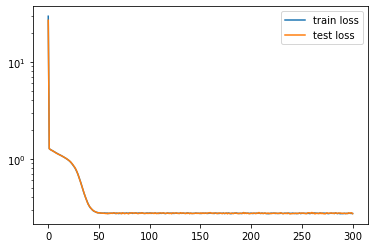

In [ ]:
plt.plot(np.linspace(0,epochs, epochs), losses, label = 'train loss')
plt.yscale('log')
plt.plot(np.linspace(0, epochs, epochs), test_losses, label = 'test loss')
plt.yscale('log')
plt.legend()
plt.savefig('plot.png')
plt.show()